In [5]:
# ! pip install fbprophet --quiet
# ! pip install plotly --quiet 

If you face any error related to pystan module while installing fbprophet, follow the solution given here - https://stackoverflow.com/questions/66887159/im-trying-to-use-prophet-from-fbprophet-but-im-getting-this-excuciatingly-long

In [59]:
from fbprophet import Prophet
import pandas as pd
from datetime import timedelta

from matplotlib import pyplot as plt

In [60]:
fbprophet.__version__

'0.7.1'

In [61]:
# Read csv file
df = pd.read_csv('../data/nz.csv')

In [62]:
# An overlook of data
df.head()

,date,people_vaccinated,people_fully_vaccinated,total_vaccinations,vaccine,location,source_url,total_boosters
0,2021-02-19,29,0,29,Pfizer/BioNTech,New Zealand,https://www.health.govt.nz/our-work/diseases-a...,NaN
1,2021-02-20,94,0,94,Pfizer/BioNTech,New Zealand,https://www.health.govt.nz/our-work/diseases-a...,NaN
2,2021-02-21,162,1,163,Pfizer/BioNTech,New Zealand,https://www.health.govt.nz/our-work/diseases-a...,NaN
3,2021-02-22,610,1,611,Pfizer/BioNTech,New Zealand,https://www.health.govt.nz/our-work/diseases-a...,NaN
4,2021-02-23,968,1,969,Pfizer/BioNTech,New Zealand,https://www.health.govt.nz/our-work/diseases-a...,NaN


In [63]:
# Columns
df.columns

Index(['date', 'people_vaccinated', 'people_fully_vaccinated',
       'total_vaccinations', 'vaccine', 'location', 'source_url',
       'total_boosters'],
      dtype='object')

In [64]:
# Convert time column values to pandas datatime format
df['date'] = pd.to_datetime(df['date'])

In [65]:
# Drop columns which are not required
df = df.drop(['vaccine', 'location', 'source_url', 'total_boosters', 'people_vaccinated', 'people_fully_vaccinated'], axis=1)

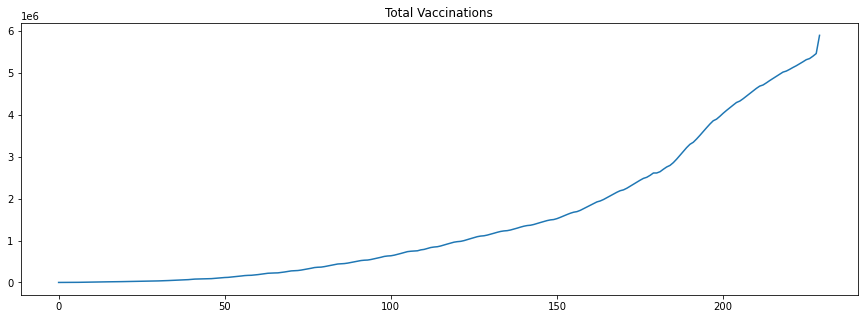

In [66]:
plt.figure(figsize=(15,5))
plt.plot(df['total_vaccinations'])
plt.title("Total Vaccinations")
plt.show()

In [67]:
df.columns = ['ds', 'y']

In [68]:
# define the model
model = Prophet()

In [69]:
# fit the model
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.99628


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       934.053     0.0238291       3360.24           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       943.328    0.00121642       182.145           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       947.165   0.000262732       204.795      0.1507      0.1507      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       948.917   6.12658e-05       316.811   1.568e-07       0.001      464  LS failed, Hessian reset 
     399       951.668   0.000284341       124.662           1           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       951.844   1.68302e-05       82.3255    1.13e-07       0.001      5

In [70]:
# Number of days in the future to forecast
num_days = 90

In [71]:
# Extend the date list for next 90 days
last_date = list(df['ds'])[-1]

forecast_dates = []
for i in range(num_days):
    cdate = last_date + timedelta(days=1)
    last_date = cdate
    forecast_dates.append(cdate)

In [72]:
forecast_df = pd.DataFrame({'ds': forecast_dates})

In [73]:
forecast_df.head()

,ds
0,2021-10-12
1,2021-10-13
2,2021-10-14
3,2021-10-15
4,2021-10-16


In [74]:
forecast_values = model.predict(forecast_df)

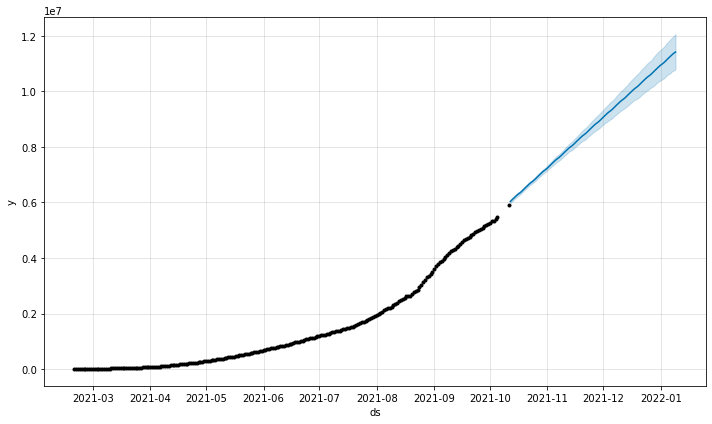

In [75]:
model.plot(forecast_values)
plt.show()

#### Plotting the same results using matplotlib so that it can be compared to plots in ARIMA

In [76]:
results = list(forecast_values['yhat'])

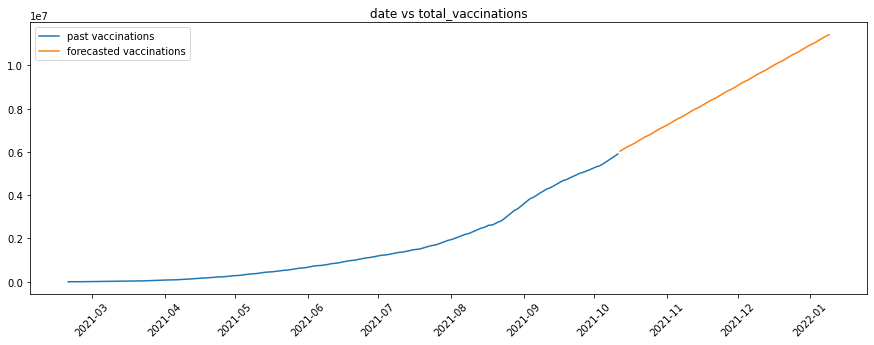

Last value: 11420187.563491954


In [77]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(df['ds'], df['y'], label='past vaccinations')
plt.plot(forecast_df['ds'], forecast_values['yhat'], label='forecasted vaccinations')
plt.title("date vs total_vaccinations")
plt.legend()
plt.xticks(rotation=45)
plt.show()

print(f"Last value: {results[-1]}")

#### Total vaccinations are projected to reach 11.4 million in next 3 months.